# Shared Control & Repeated measures

> Explanation of how to use dabest for shared control and repeated measures analyses.

- order: 3

The **shared control plot** and **repeated measures plot** display common experimental
paradigms, where several test samples are compared against a common
reference sample. The shared control plot is for unpaired data, while the
repeated measures plot is for paired data.

These types of Cumming plots are automatically generated if the tuple passed
to ``idx`` has more than two data columns.

## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 36.60it/s]

Numba compilation complete!
We're using DABEST v2024.03.30


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # to suppress warnings related to points not being able to be plotted due to dot size

## Creating a demo dataset

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed so the results are reproducible.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                   'Gender'    : gender, 'ID'  : id_col
                  })

## Shared Control Plot

In [ ]:
shared_control = dabest.load(df, idx=("Control 1", "Test 1",
                                          "Test 2", "Test 3",
                                          "Test 4", "Test 5", "Test 6")
                                 )
shared_control

DABEST v2024.03.30
                  
Good morning!
The current time is Sat Jan 18 11:33:54 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 1
3. Test 3 minus Control 1
4. Test 4 minus Control 1
5. Test 5 minus Control 1
6. Test 6 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
shared_control.mean_diff

DABEST v2024.03.30
                  
Good morning!
The current time is Sat Jan 18 11:33:56 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.205, 0.774].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 2 is -0.542 [95%CI -0.915, -0.206].
The p-value of the two-sided permutation t-test is 0.0042, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 3 is 0.174 [95%CI -0.273, 0.647].
The p-value of the two-sided permutation t-test is 0.479, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 4 is 0.79 [95%CI 0.325, 1.33].
The p-value of the two-sided permutation t-test is 0.0042, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 5 is 0.265 [95%CI 0.0115, 0.497].
The p-value of the two-sided permutation t-test is 0.0404, calcu

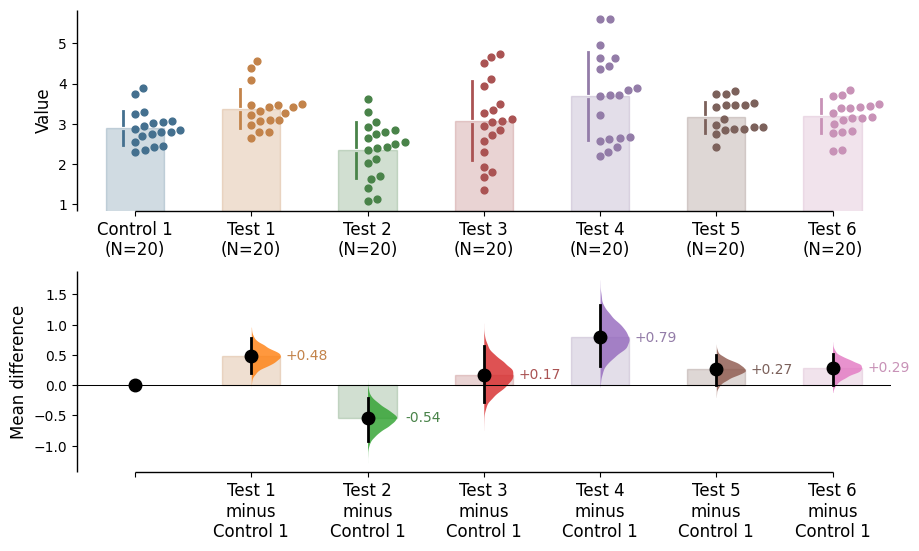

In [ ]:
shared_control.mean_diff.plot();

``dabest`` allows for combining both two-group and shared control experiments into the same plot. This empowers you to perform robust analyses and present complex visualizations of your statistics elegantly.

In [ ]:
multi_groups = dabest.load(df, idx=(("Control 1", "Test 1",),
                                         ("Control 2", "Test 2","Test 3"),
                                         ("Control 3", "Test 4","Test 5", "Test 6")
                                       ))
multi_groups

DABEST v2024.03.30
                  
Good morning!
The current time is Sat Jan 18 11:36:12 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 2
4. Test 4 minus Control 3
5. Test 5 minus Control 3
6. Test 6 minus Control 3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_groups.mean_diff

DABEST v2024.03.30
                  
Good morning!
The current time is Sat Jan 18 11:36:19 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.205, 0.774].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 2 is -1.38 [95%CI -1.93, -0.905].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 3 is -0.666 [95%CI -1.29, -0.0788].
The p-value of the two-sided permutation t-test is 0.0352, calculated for legacy purposes only. 

The unpaired mean difference between Control 3 and Test 4 is 0.362 [95%CI -0.111, 0.901].
The p-value of the two-sided permutation t-test is 0.161, calculated for legacy purposes only. 

The unpaired mean difference between Control 3 and Test 5 is -0.164 [95%CI -0.398, 0.0747].
The p-value of the two-sided permutation t-test is 0.208, calc

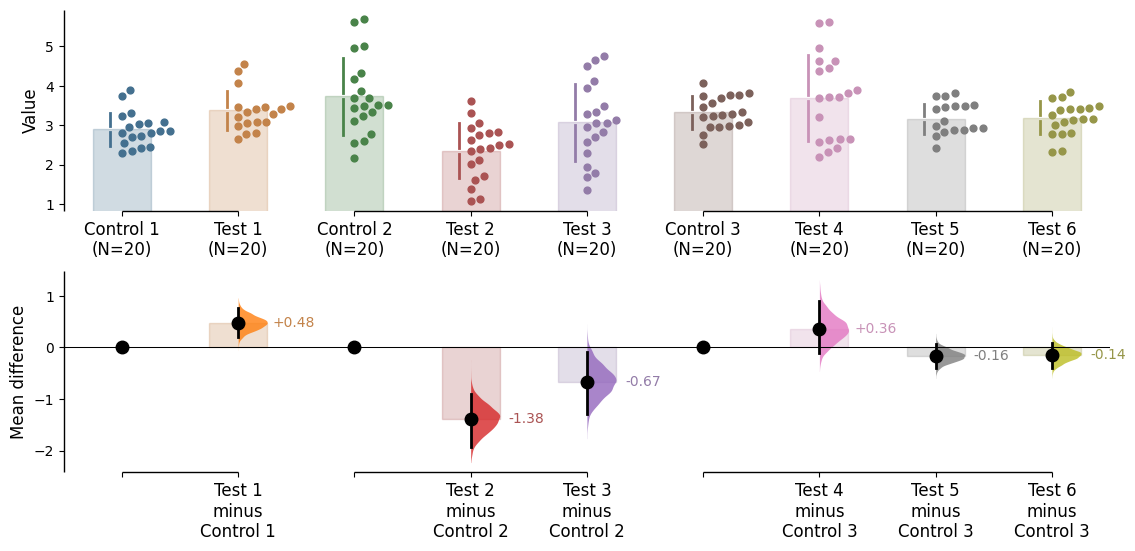

In [ ]:
multi_groups.mean_diff.plot();

## Repated Measures Plot

DABEST version 2023.02.14 expands the repertoire of plots for experiments with repeated-measures designs. DABEST now allows the visualization of paired experiments with one control and multiple test 
groups, as well as repeated measurements of the same group. This is an improved version of paired data plotting in previous versions, which only supported computations involving one test group and one control group.

The repeated-measures function supports the calculation of effect sizes for
paired data, either based on sequential comparisons (group i vs group i + 1) 
or baseline comparisons (control vs group i). To use these features, 
you can simply declare the argument ``paired = "sequential"`` or ``paired = "baseline"`` 
correspondingly while running ``dabest.load()``. As in the previous version, you must also pass a column in the dataset that indicates the identity of each observation, using the 
``id_col`` keyword. 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #8a6d3b;; background-color: #fcf8e3; border-color: #faebcc;">
 **(Please note that** ``paired = True`` **and** ``paired = False`` **are no longer valid since v2023.02.14)**
</div>



In [ ]:
baseline_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="baseline", id_col="ID")
baseline_repeated_measures

DABEST v2024.03.30
                  
Good afternoon!
The current time is Sat Jan 18 14:28:58 2025.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 1
3. Test 3 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
baseline_repeated_measures.mean_diff

DABEST v2024.03.30
                  
Good afternoon!
The current time is Sat Jan 18 14:29:13 2025.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.48 [95%CI 0.241, 0.749].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 2 is -0.542 [95%CI -0.977, -0.179].
The p-value of the two-sided permutation t-test is 0.014, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 3 is 0.174 [95%CI -0.303, 0.702].
The p-value of the two-sided permutation t-test is 0.505, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference 

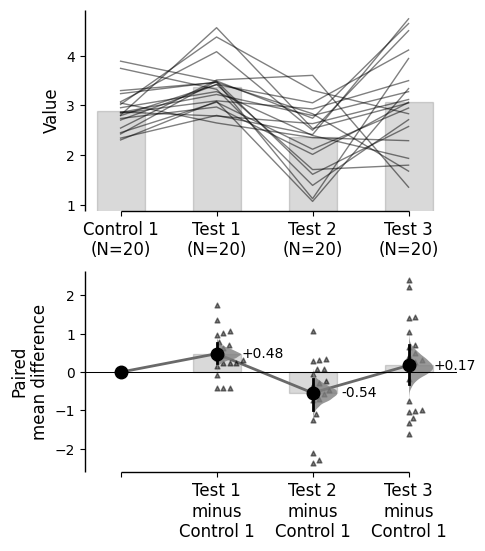

In [ ]:
baseline_repeated_measures.mean_diff.plot();

In [ ]:
sequential_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="sequential", id_col="ID")
sequential_repeated_measures

DABEST v2024.03.30
                  
Good afternoon!
The current time is Sat Jan 18 14:29:03 2025.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Test 1
3. Test 3 minus Test 2

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
sequential_repeated_measures.mean_diff

DABEST v2024.03.30
                  
Good afternoon!
The current time is Sat Jan 18 14:29:33 2025.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.48 [95%CI 0.241, 0.749].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 1 and Test 2 is -1.02 [95%CI -1.35, -0.709].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 2 and Test 3 is 0.716 [95%CI 0.153, 1.2].
The p-value of the two-sided permutation t-test is 0.022, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assu

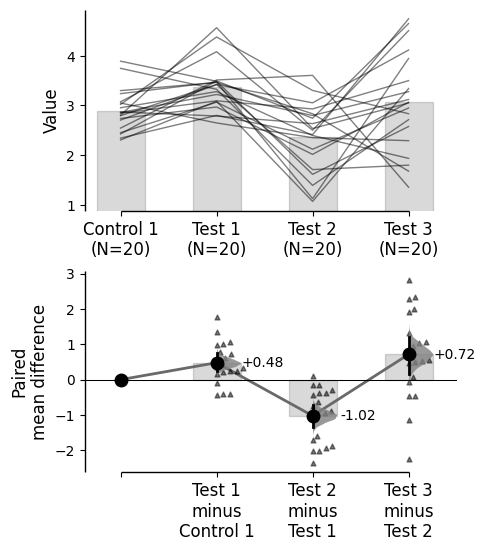

In [ ]:
sequential_repeated_measures.mean_diff.plot();

Similar to unpaired data, DABEST empowers you to perform complex 
visualizations and statistics for paired data.

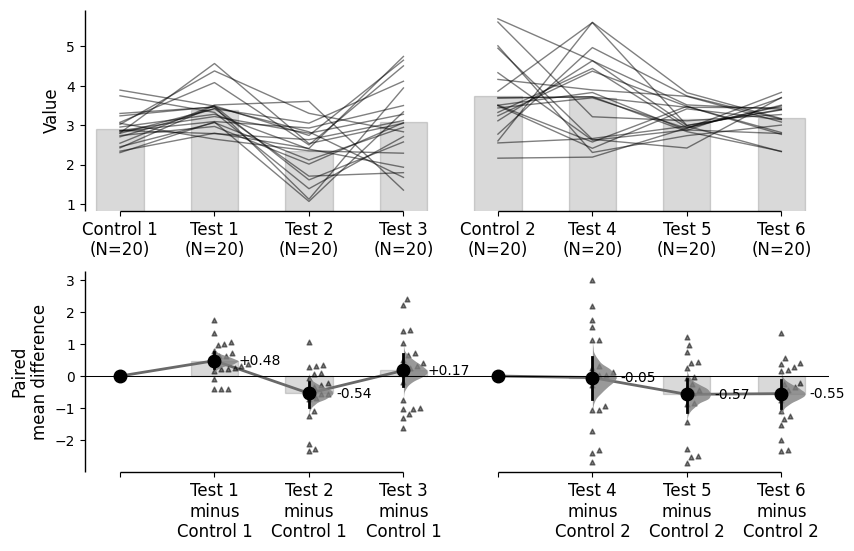

In [ ]:
multi_baseline_repeated_measures = dabest.load(df, idx=(("Control 1", "Test 1", "Test 2", "Test 3"),
                                                      ("Control 2", "Test 4", "Test 5", "Test 6")),
                                               paired="baseline", id_col="ID")
multi_baseline_repeated_measures.mean_diff.plot();

For further aesthetic changes, see the plot_aesthetics tutorial page.
